In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Loading all the Libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

## Reading the dataset

In [3]:
# Importing BikeSharing.csv
df = pd.read_csv('Bike Analysis.csv')

In [4]:
# Looking at the first five rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Checking null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Checking Null Values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### There are no NULL Values in the dataset

In [8]:
#Checking the shape of the dataframe
df.shape

(730, 16)

### The dataset has 730 rows and 16 columns

In [9]:


# Define the numerical columns
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

# Identify the variable with the highest correlation with the target variable
target_variable = 'cnt'
highest_correlation = correlation_matrix[target_variable].drop(target_variable).idxmax()

print(f"The variable with the highest correlation with the target variable is: {highest_correlation}")


               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991696  0.128565  -0.158186  0.627044
atemp      0.991696  1.000000  0.141512  -0.183876  0.630685
hum        0.128565  0.141512  1.000000  -0.248506 -0.098543
windspeed -0.158186 -0.183876 -0.248506   1.000000 -0.235132
cnt        0.627044  0.630685 -0.098543  -0.235132  1.000000
The variable with the highest correlation with the target variable is: atemp


In [10]:
# Dropping Column instant as this is the index
df = df.drop('instant',axis=1)

In [11]:
#Dropping dteday as there is seperate columns for Year month and day
df = df.drop('dteday',axis=1)

In [12]:
# Some columns have datatype as integer but its categorical in nature. 
# Doing the data tranformation in season column.- season : season (1:spring, 2:summer, 3:fall, 4:winter)
df['season'] = df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [13]:
# Doing the data tranformation in mnth : month ( 1 to 12)
df['mnth'] = df['mnth'].map({1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUN',7:'JULY',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'
})
df['mnth'].value_counts()

JAN     62
MAR     62
MAY     62
JULY    62
AUG     62
OCT     62
DEC     62
APR     60
JUN     60
SEP     60
NOV     60
FEB     56
Name: mnth, dtype: int64

In [14]:
df['weekday'] = df['weekday'].map({1:'MON',2:'TUE',3:'WED',4:'THUR',5:'FRI',6:'SAT',0:'SUN'})
df['weekday'].value_counts()

SAT     105
SUN     105
MON     105
TUE     104
THUR    104
FRI     104
WED     103
Name: weekday, dtype: int64

In [15]:
## weathersit : 
#		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
df['weathersit'] = df['weathersit'].map({1:'Clear, Few clouds, Partly cloudy, Partly cloudy',2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                        3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})
df['weathersit'].value_counts()

Clear, Few clouds, Partly cloudy, Partly cloudy                                            463
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               246
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     21
Name: weathersit, dtype: int64

In [16]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,JAN,0,SAT,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,JAN,0,SUN,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,JAN,0,MON,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,JAN,0,TUE,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,JAN,0,WED,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,DEC,0,THUR,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,spring,1,DEC,0,FRI,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,spring,1,DEC,0,SAT,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,spring,1,DEC,0,SUN,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",10.489153,11.58500,48.3333,23.500518,364,1432,1796


# EDA

In [17]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [18]:
categorical_columns = ["season", "yr", "mnth", "holiday", "weekday",
                       "workingday", "weathersit"
                       ]

numerical_columns =["temp", "atemp", "hum",'windspeed','casual','registered']

target_column = "cnt"

## Plotting pairplot for Numerical variables

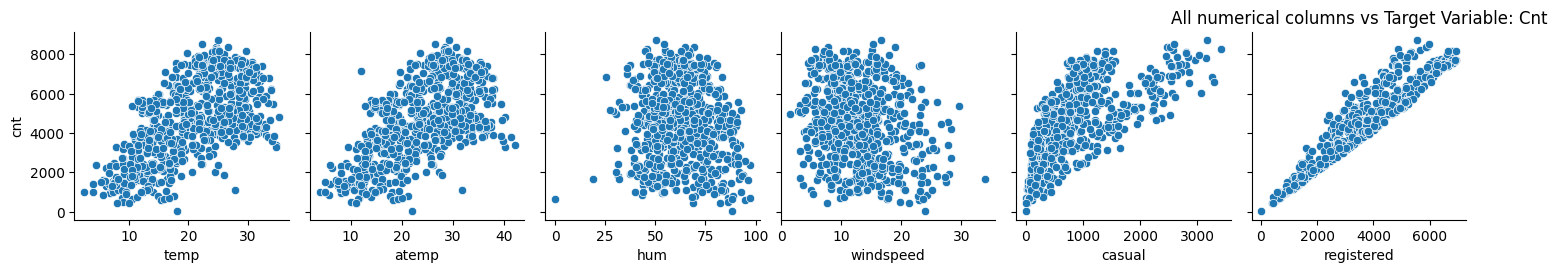

In [19]:
sns.pairplot(df,x_vars = numerical_columns, y_vars=['cnt'])
plt.title("All numerical columns vs Target Variable: Cnt")
plt.show()

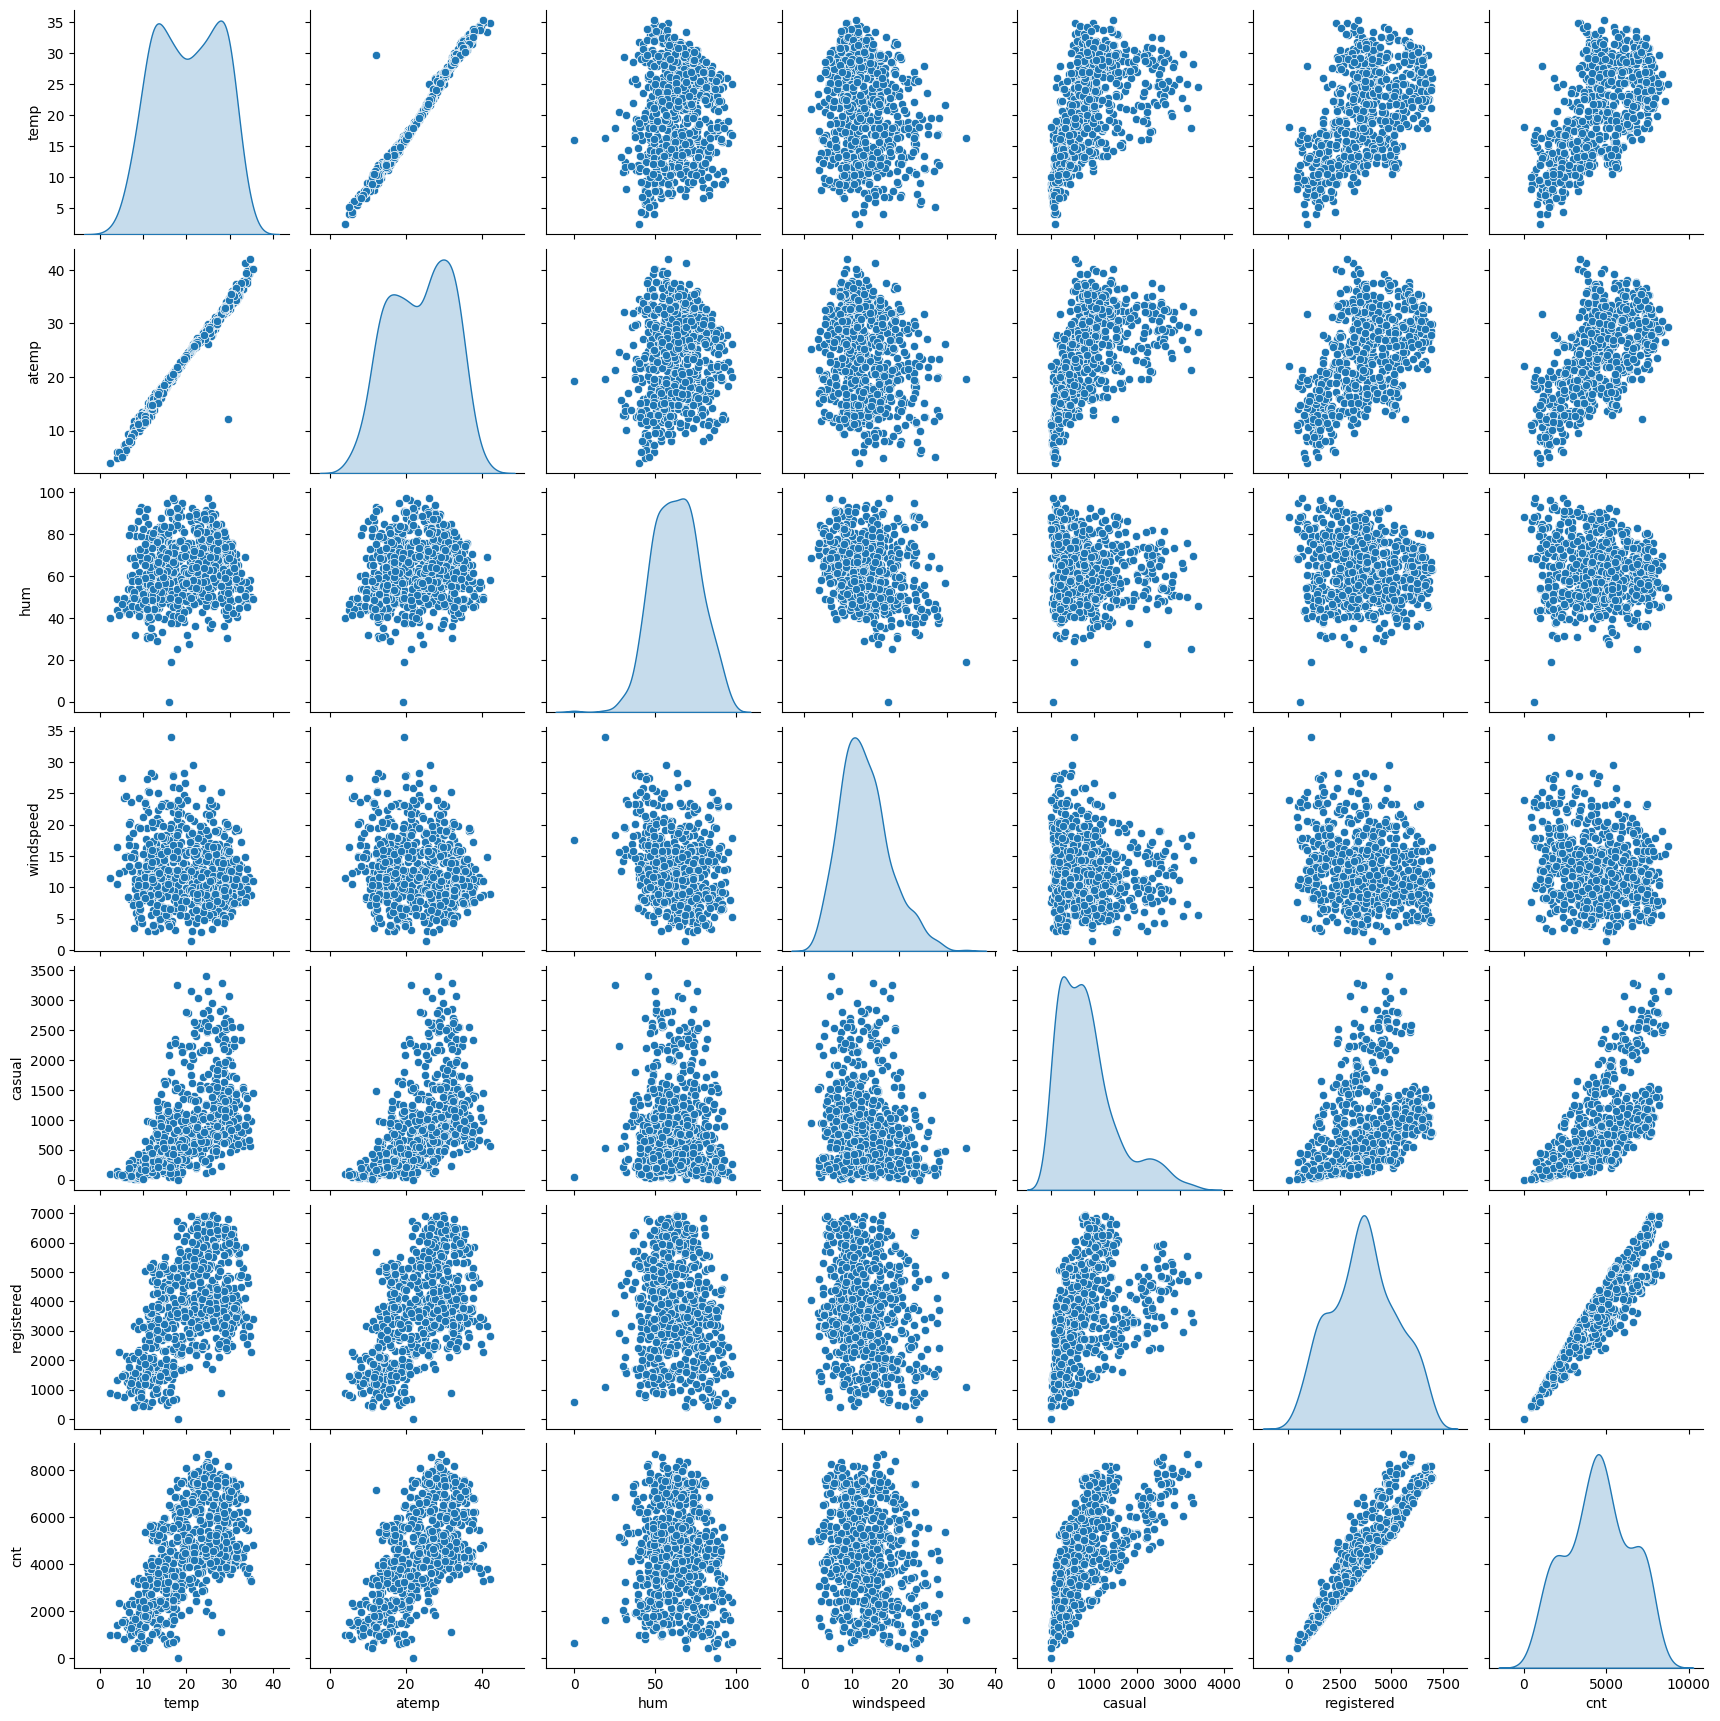

In [20]:
numerical_columns=df[['temp','atemp', 'hum', 'windspeed','casual','registered','cnt']]
sns.pairplot(numerical_columns, diag_kind='kde')
plt.show()

### Categorical variables

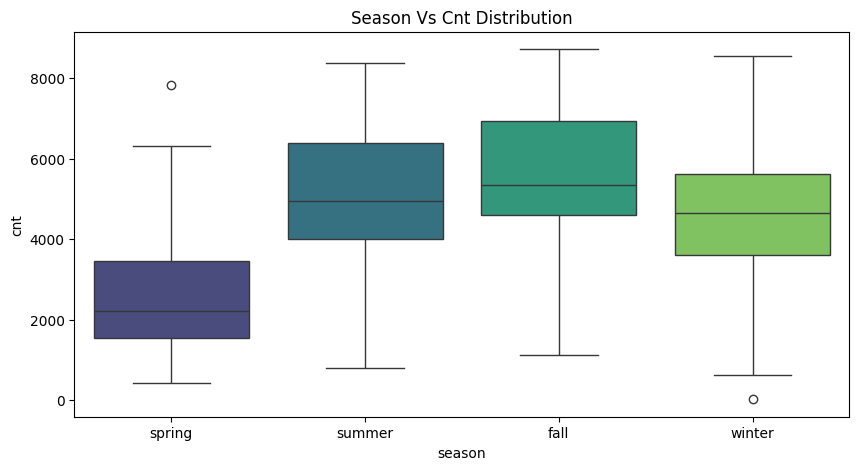

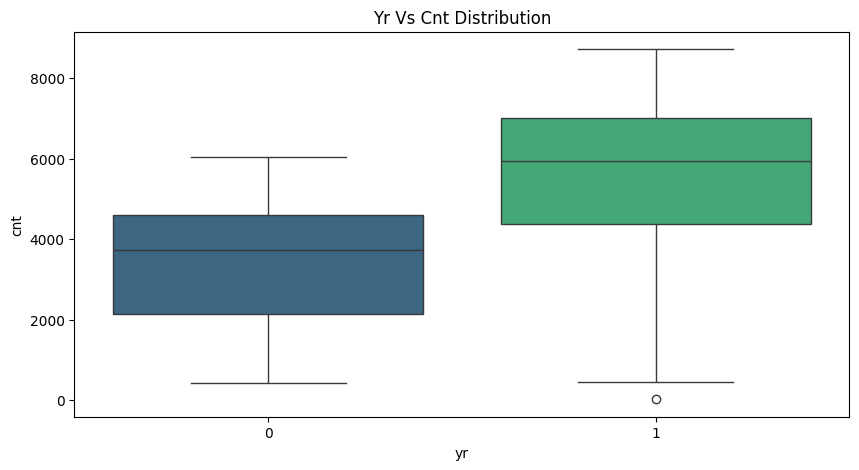

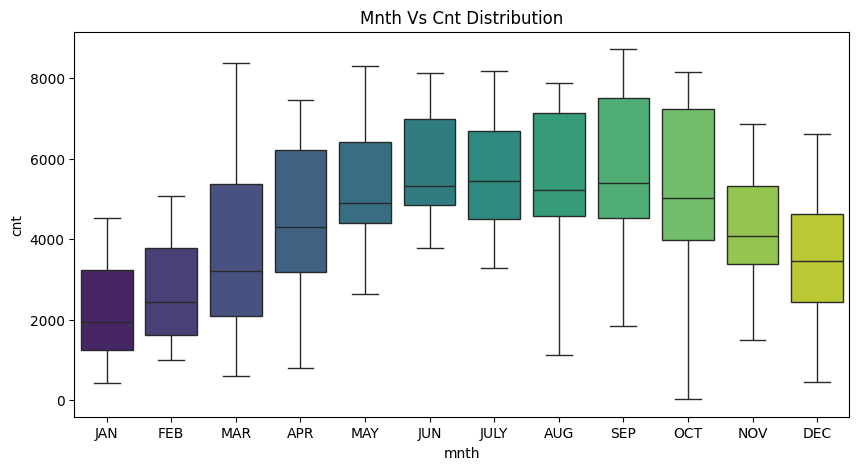

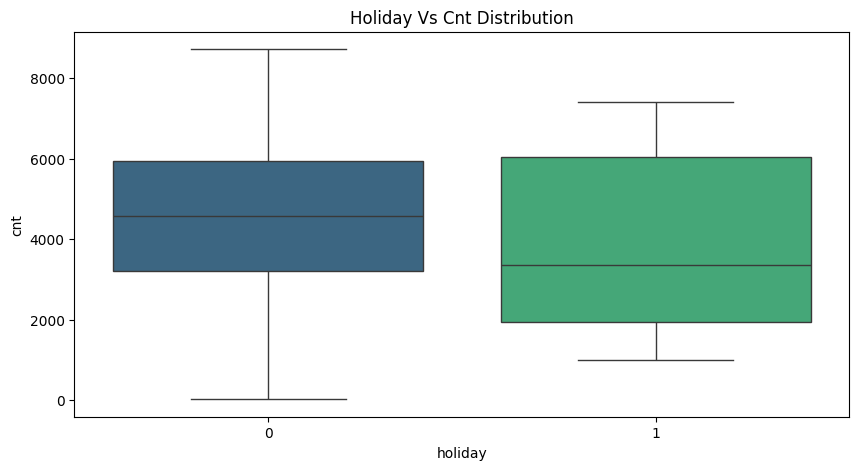

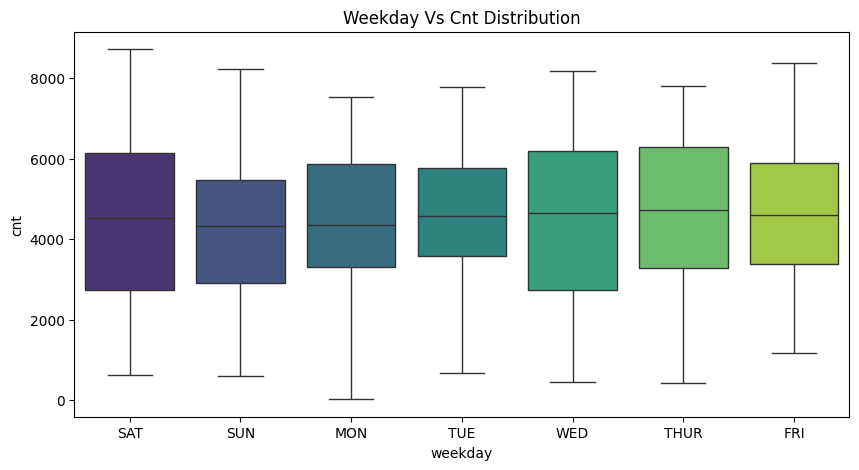

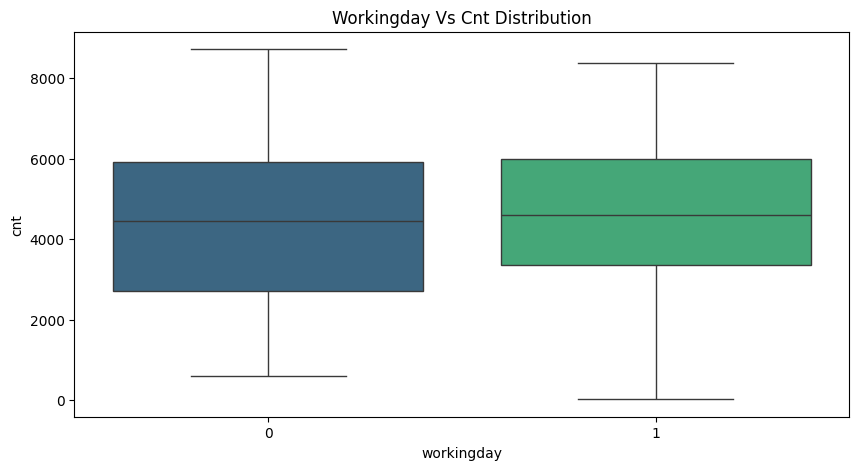

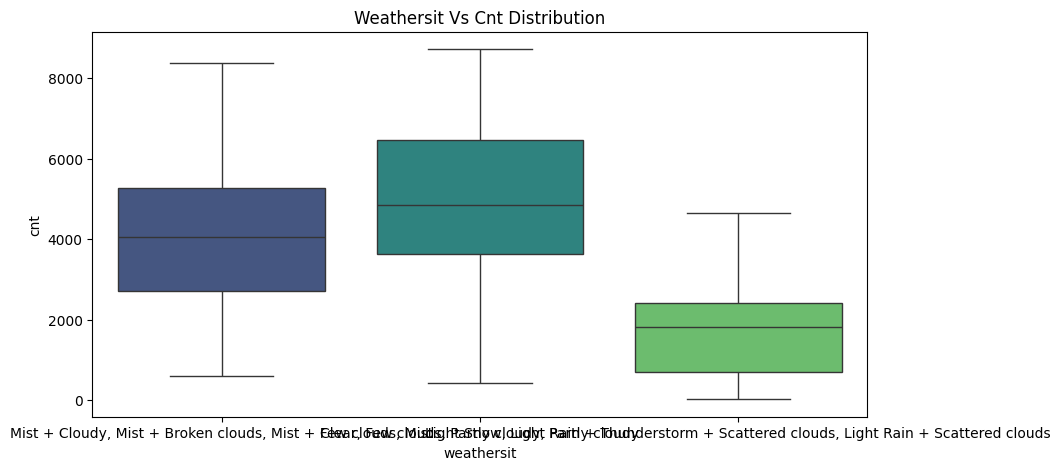

In [21]:
# Analysing the count of values for each loan status based on each numerical variables
for col in categorical_columns:
    plt.figure(figsize=(10, 5))

    sns.boxplot(data=df, y=target_column, x=col, palette='viridis')
    plt.xlabel(col)

    plt.title(f'{col.replace("_", " ").capitalize()} Vs {target_column.replace("_", " ").capitalize()} Distribution')
    plt.ylabel(target_column)
    plt.show()

### Year 2019 has the highest number of bike rentals
### Fall has highest average followed by summer
### Months in Q3 has almost same number of bike rentals
### Bike rentals are more in working days compared to holidays

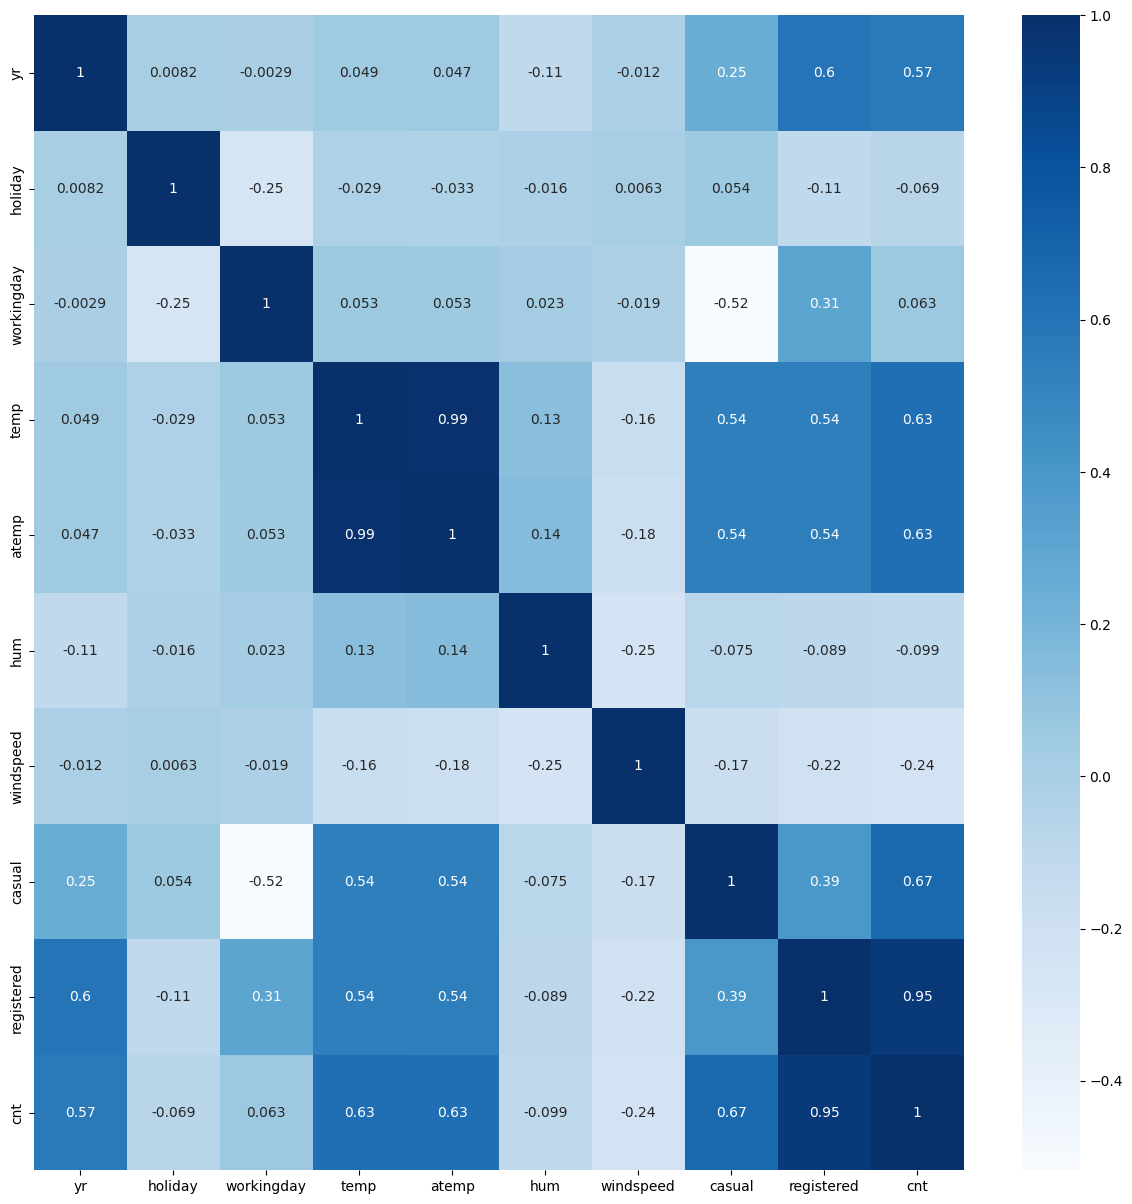

In [22]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

### Casual and registered shows a linear relationship with target variables CNT And as per dictionary CNT is sum of casual and registered. So we can drop this variable.
### Temp and atemp columns are also corelated. we can drop atemp variable as well.

In [23]:
df = df.drop(columns = ['casual','registered','atemp'],axis = 1)

### Creating Dummy variables for Season,mnth,weekday,weatherlist. After creating dummy variables, drop the original columns and the first column for each dummy variable.

In [24]:
season = pd.get_dummies(df['season'], drop_first=True)
mnth = pd.get_dummies(df['mnth'], drop_first=True)
weekday = pd.get_dummies(df['weekday'], drop_first=True)
weathersit = pd.get_dummies(df['weathersit'], drop_first=True)

In [25]:
## Now we can join original data and dummy variable
final_data=pd.concat([df,season,mnth,weekday,weathersit],axis=1)
final_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,OCT,SEP,MON,SAT,SUN,THUR,TUE,WED,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,spring,0,JAN,0,SAT,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,JAN,0,SUN,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,JAN,0,MON,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,JAN,0,TUE,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,JAN,0,WED,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [26]:
final_data=final_data.drop(['season','mnth','weekday','weathersit'],axis=1)
final_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,OCT,SEP,MON,SAT,SUN,THUR,TUE,WED,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Creating Train and Test Dataset

In [27]:
# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(final_data, train_size = 0.70, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


## Scaling for numerical variables

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
numerical_variables = ['temp','hum','windspeed','cnt']
df_train[numerical_variables] = scaler.fit_transform(df_train[numerical_variables])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,OCT,SEP,MON,SAT,SUN,THUR,TUE,WED,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,OCT,SEP,MON,SAT,SUN,THUR,TUE,WED,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


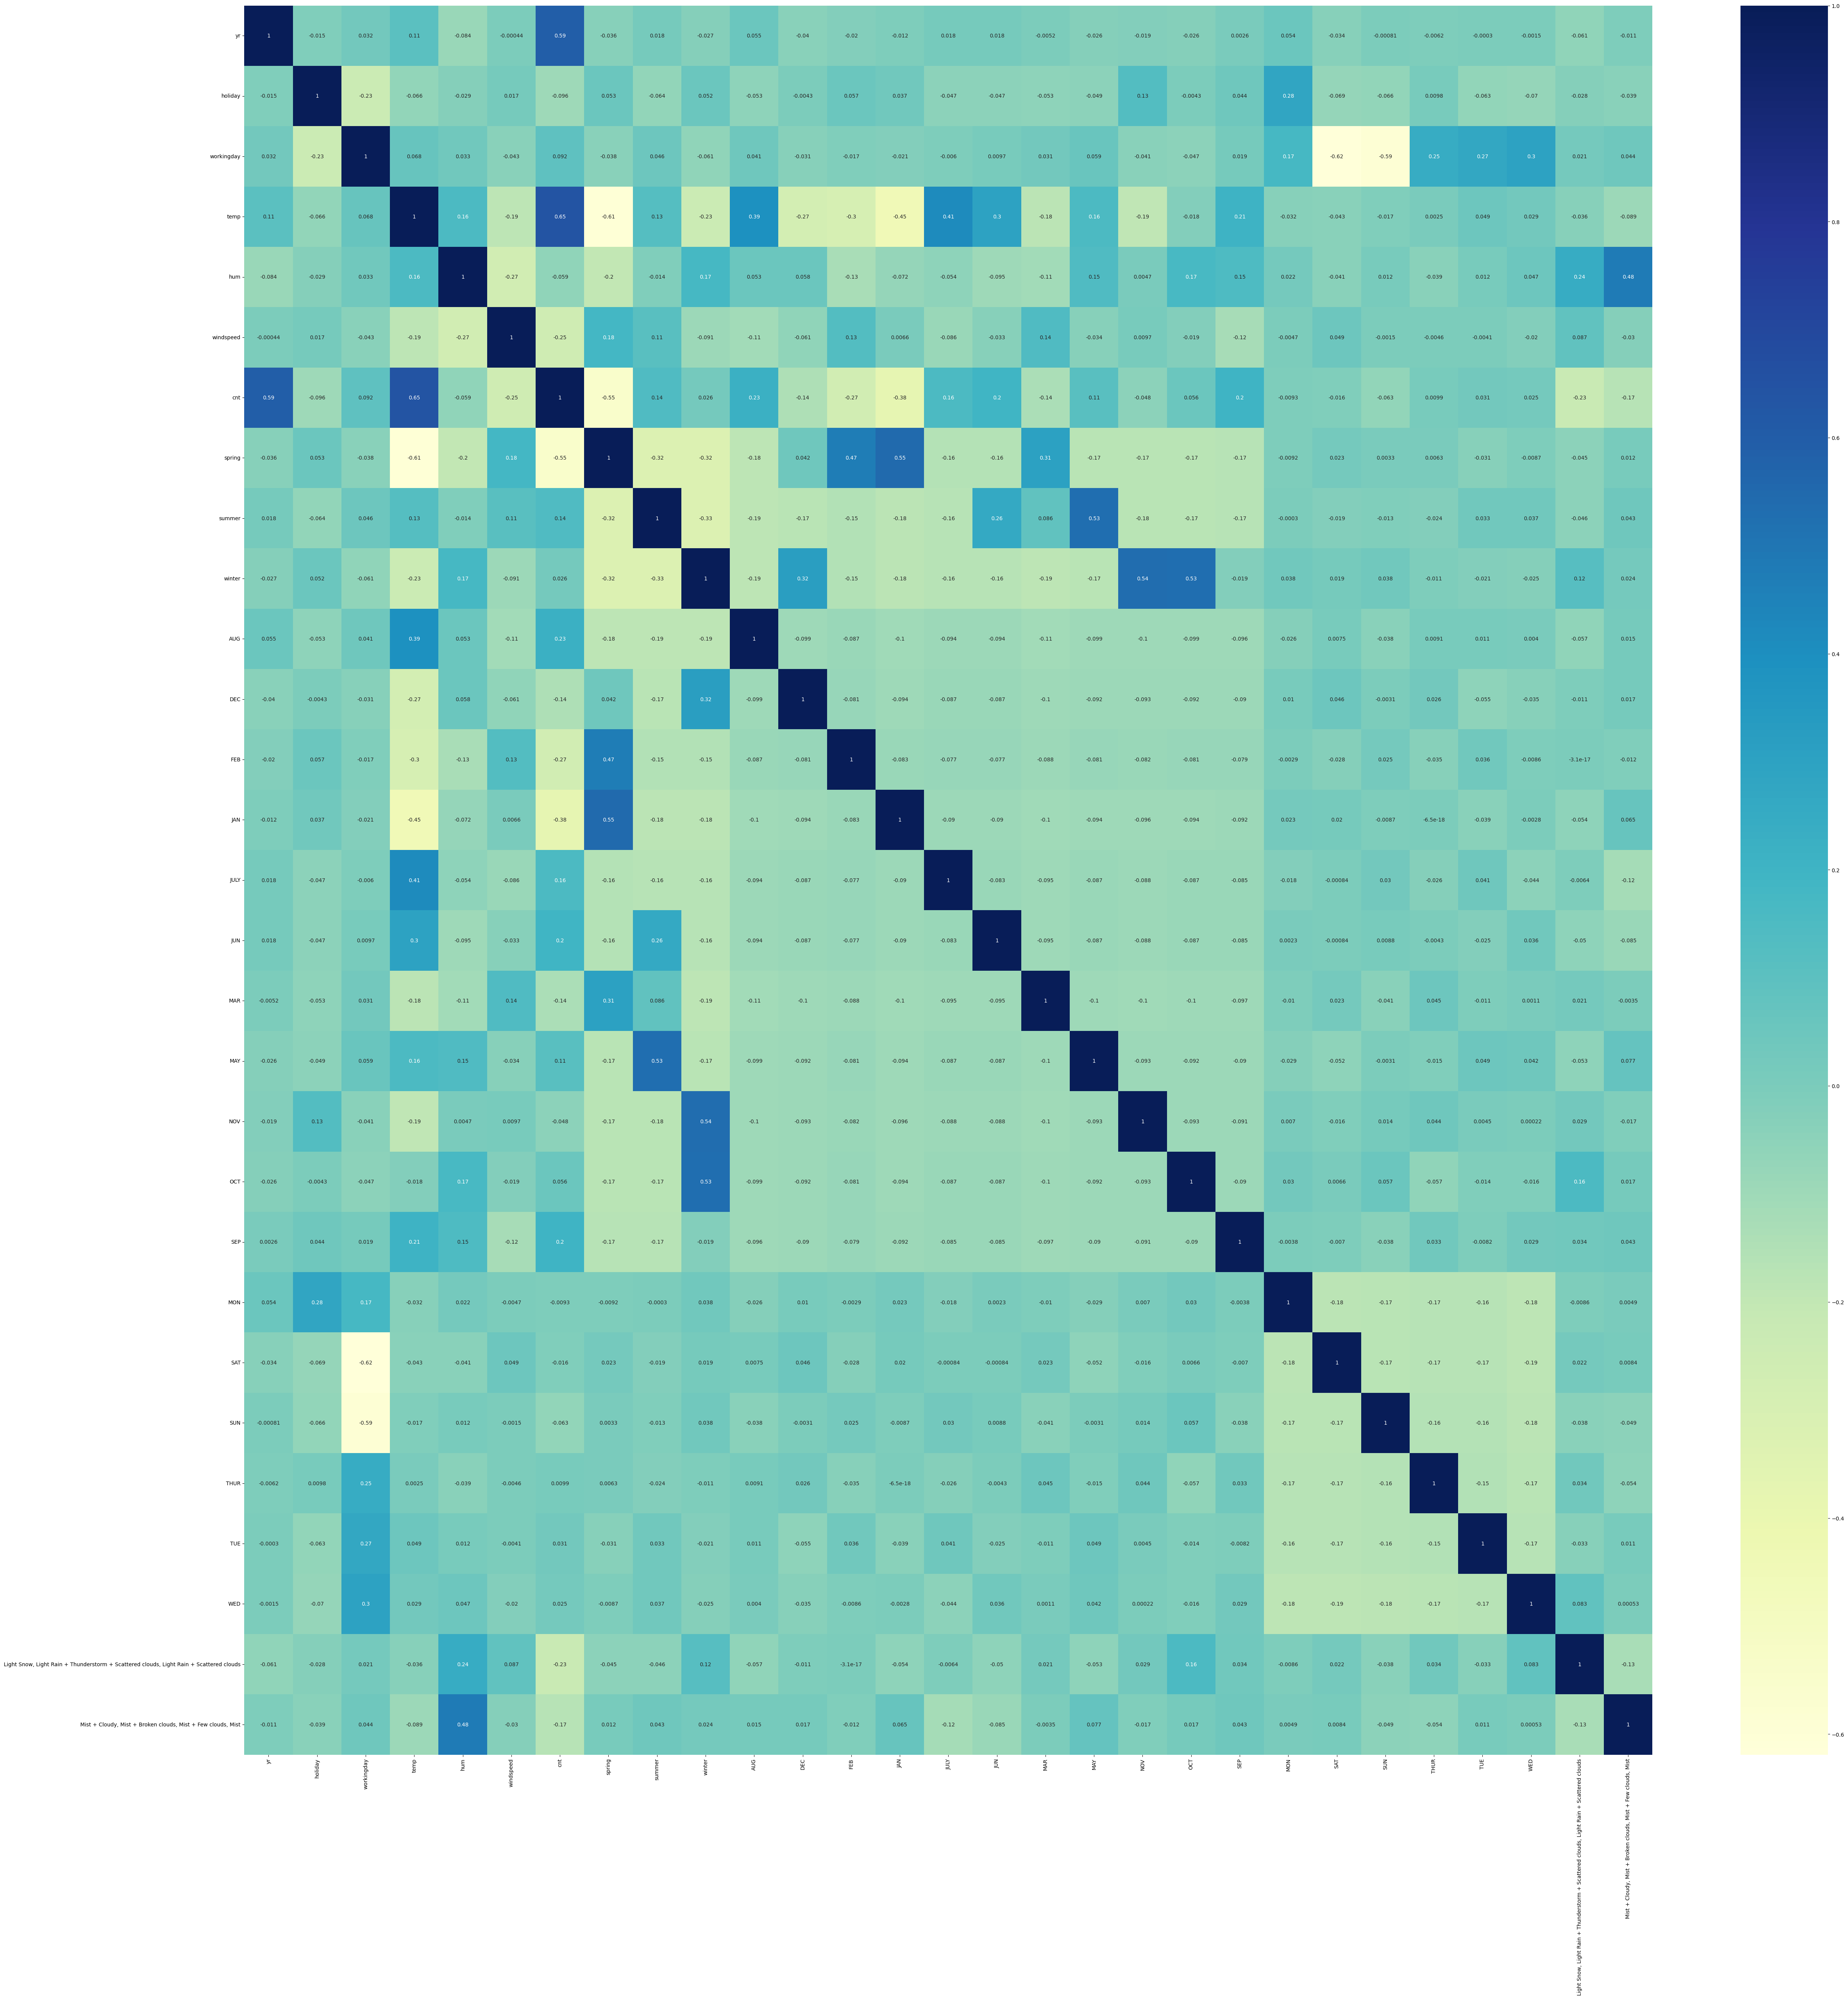

In [31]:
plt.figure(figsize = (60,60))
sns.heatmap(df_train.corr(),annot = True,cmap = 'YlGnBu')
plt.show()

### Dividing the dataset into x_train and y_train

In [32]:
y_train = df_train.pop('cnt')
X_train = df_train

# Multiple linear regression with all variables

In [33]:
X_train_xm = sm.add_constant(X_train)

lm = sm.OLS(y_train, X_train_xm).fit()

lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.00e-181
Time:                        21:18:47   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2431      0.035      6.888      0.000       0.174       0.312
yr                                                                                          0.2324      0.008     28.819      0.000       0.217       0.248
holiday                                                                                     0.0100      0.024      0.418      0.676      -0.037       0.057
workingday                                                                                  0.0962      0.012      7.835      0.000       0.072       0.120
temp                                                                                        0.4454      0.046      9.628      0.000       0.354       0.536
hum                                                                                        -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                                                                                  -0.1860      0.026     -7.226      0.000      -0.237      -0.135
spring                                                                                     -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer                                                                                      0.0430      0.026      1.645      0.101      -0.008       0.094
winter                                                                                      0.1076      0.028      3.853      0.000       0.053       0.163
AUG                                                                                         0.0204      0.034      0.607      0.544      -0.046       0.086
DEC                                                                                        -0.0443      0.034     -1.317      0.189      -0.110       0.022
FEB                                                                                        -0.0324      0.033     -0.985      0.325      -0.097       0.032
JAN                                                                                        -0.0633      0.034     -1.885      0.060      -0.129       0.003
JULY                                                                                       -0.0338      0.035     -0.969      0.333      -0.102       0.035
JUN                                                                                         0.0046      0.025      0.186      0.853      -0.044       0.053
MAR                                                                                         0.0013      0.025      0.05

In [34]:
 # Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.54
21,SAT,19.71
22,SUN,18.34
6,spring,10.75
8,winter,9.44
7,summer,8.27
3,temp,7.08
17,NOV,6.79
18,OCT,6.47
9,AUG,6.36


## Since VIF value is too high , we can try RFE Recursive feature elimination

In [35]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(estimator=lm, n_features_to_select=20)
rfe = rfe.fit(X_train,y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('AUG', False, 2),
 ('DEC', True, 1),
 ('FEB', True, 1),
 ('JAN', True, 1),
 ('JULY', True, 1),
 ('JUN', False, 8),
 ('MAR', False, 9),
 ('MAY', True, 1),
 ('NOV', True, 1),
 ('OCT', False, 3),
 ('SEP', True, 1),
 ('MON', False, 4),
 ('SAT', True, 1),
 ('SUN', True, 1),
 ('THUR', False, 6),
 ('TUE', False, 5),
 ('WED', False, 7),
 ('Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  True,
  1),
 ('Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', True, 1)]

In [37]:
#taking all the necessary columns
col = X_train.columns[rfe.support_]

In [38]:
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'DEC', 'FEB', 'JAN', 'JULY', 'MAY', 'NOV', 'SEP',
       'SAT', 'SUN',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [39]:
x_train_rfe = X_train[col]

In [40]:
x_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,DEC,FEB,JAN,JULY,MAY,NOV,SEP,SAT,SUN,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
x_train_sm = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_sm).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.20e-189
Time:                        21:18:47   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2475      0.030      8.194      0.000       0.188       0.307
yr                                                                                          0.2318      0.008     29.103      0.000       0.216       0.247
holiday                                                                                     0.0003      0.022      0.016      0.987      -0.042       0.043
workingday                                                                                  0.0936      0.010      9.443      0.000       0.074       0.113
temp                                                                                        0.4527      0.038     11.846      0.000       0.378       0.528
hum                                                                                        -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed                                                                                  -0.1873      0.025     -7.371      0.000      -0.237      -0.137
spring                                                                                     -0.0553      0.022     -2.528      0.012      -0.098      -0.012
summer                                                                                      0.0295      0.017      1.747      0.081      -0.004       0.063
winter                                                                                      0.1001      0.018      5.618      0.000       0.065       0.135
DEC                                                                                        -0.0488      0.018     -2.692      0.007      -0.084      -0.013
FEB                                                                                        -0.0348      0.021     -1.626      0.105      -0.077       0.007
JAN                                                                                        -0.0650      0.021     -3.067      0.002      -0.107      -0.023
JULY                                                                                       -0.0510      0.018     -2.844      0.005      -0.086      -0.016
MAY                                                                                         0.0229      0.017      1.325      0.186      -0.011       0.057
NOV                                                                                        -0.0461      0.019     -2.456      0.014      -0.083      -0.009
SEP                                                                                         0.0723      0.017      4.34

In [42]:
 # Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,60.98
16,SAT,14.60
17,SUN,13.91
6,spring,5.79
3,temp,4.88
8,winter,3.88
7,summer,3.49
1,holiday,3.43
11,JAN,2.38
4,hum,1.97


## Model 2 -  Drop variable workingday beacuse of high VIF Value

In [43]:
x_train_new = x_train_rfe.drop(["workingday"], axis=1)

In [44]:
x_train_new

,yr,holiday,temp,hum,windspeed,spring,summer,winter,DEC,FEB,JAN,JULY,MAY,NOV,SEP,SAT,SUN,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,1,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,1,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,1,0,0,0,1,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,0,1,1,0,0,0,0,0,0,1,0,0,1
79,0,0,0.462664,0.759870,0.529881,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
x_train_sm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_sm).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.20e-189
Time:                        21:18:48   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3411      0.037      9.207      0.000       0.268       0.414
yr                                                                                          0.2318      0.008     29.103      0.000       0.216       0.247
holiday                                                                                    -0.0933      0.025     -3.679      0.000      -0.143      -0.043
temp                                                                                        0.4527      0.038     11.846      0.000       0.378       0.528
hum                                                                                        -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed                                                                                  -0.1873      0.025     -7.371      0.000      -0.237      -0.137
spring                                                                                     -0.0553      0.022     -2.528      0.012      -0.098      -0.012
summer                                                                                      0.0295      0.017      1.747      0.081      -0.004       0.063
winter                                                                                      0.1001      0.018      5.618      0.000       0.065       0.135
DEC                                                                                        -0.0488      0.018     -2.692      0.007      -0.084      -0.013
FEB                                                                                        -0.0348      0.021     -1.626      0.105      -0.077       0.007
JAN                                                                                        -0.0650      0.021     -3.067      0.002      -0.107      -0.023
JULY                                                                                       -0.0510      0.018     -2.844      0.005      -0.086      -0.016
MAY                                                                                         0.0229      0.017      1.325      0.186      -0.011       0.057
NOV                                                                                        -0.0461      0.019     -2.456      0.014      -0.083      -0.009
SEP                                                                                         0.0723      0.017      4.349      0.000       0.040       0.105
SAT                                                                                         0.0104      0.011      0.93

In [46]:

vif = pd.DataFrame()
X = x_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.82
2,temp,18.45
5,spring,5.47
4,windspeed,4.86
7,winter,4.09
6,summer,3.35
10,JAN,2.38
18,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.35
0,yr,2.11
9,FEB,1.92


## Model 3 - Drop variable hum beacuse of high VIF Value

In [47]:
x_train_new = x_train_new.drop(["hum"], axis=1)

In [48]:
x_train_sm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_sm).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.51e-186
Time:                        21:18:48   Log-Likelihood:                 516.82
No. Observations:                 510   AIC:                            -995.6
Df Residuals:                     491   BIC:                            -915.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2687      0.033      8.125      0.000       0.204       0.334
yr                                                                                          0.2354      0.008     29.275      0.000       0.220       0.251
holiday                                                                                    -0.0943      0.026     -3.660      0.000      -0.145      -0.044
temp                                                                                        0.4149      0.038     11.013      0.000       0.341       0.489
windspeed                                                                                  -0.1600      0.025     -6.424      0.000      -0.209      -0.111
spring                                                                                     -0.0624      0.022     -2.814      0.005      -0.106      -0.019
summer                                                                                      0.0261      0.017      1.524      0.128      -0.008       0.060
winter                                                                                      0.0869      0.018      4.883      0.000       0.052       0.122
DEC                                                                                        -0.0560      0.018     -3.059      0.002      -0.092      -0.020
FEB                                                                                        -0.0369      0.022     -1.699      0.090      -0.080       0.006
JAN                                                                                        -0.0721      0.021     -3.358      0.001      -0.114      -0.030
JULY                                                                                       -0.0461      0.018     -2.537      0.011      -0.082      -0.010
MAY                                                                                         0.0141      0.017      0.813      0.417      -0.020       0.048
NOV                                                                                        -0.0466      0.019     -2.446      0.015      -0.084      -0.009
SEP                                                                                         0.0658      0.017      3.914      0.000       0.033       0.099
SAT                                                                                         0.0119      0.011      1.061      0.289      -0.010       0.034
SUN                                                                                        -0.0472      0.012     -4.06

In [49]:
vif = pd.DataFrame()
X = x_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.43
3,windspeed,4.80
4,spring,4.37
6,winter,3.04
5,summer,2.81
9,JAN,2.21
0,yr,2.09
8,FEB,1.88
12,NOV,1.83
10,JULY,1.60


## Model 4 - Drop Summer because of high P value

In [50]:
x_train_new = x_train_new.drop(["summer"], axis=1)

In [51]:
x_train_sm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_sm).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.72e-187
Time:                        21:18:48   Log-Likelihood:                 515.61
No. Observations:                 510   AIC:                            -995.2
Df Residuals:                     492   BIC:                            -919.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3003      0.026     11.619      0.000       0.249       0.351
yr                                                                                          0.2362      0.008     29.386      0.000       0.220       0.252
holiday                                                                                    -0.0932      0.026     -3.614      0.000      -0.144      -0.043
temp                                                                                        0.3861      0.033     11.834      0.000       0.322       0.450
windspeed                                                                                  -0.1558      0.025     -6.286      0.000      -0.205      -0.107
spring                                                                                     -0.0831      0.018     -4.745      0.000      -0.117      -0.049
winter                                                                                      0.0707      0.014      4.942      0.000       0.043       0.099
DEC                                                                                        -0.0618      0.018     -3.449      0.001      -0.097      -0.027
FEB                                                                                        -0.0414      0.022     -1.924      0.055      -0.084       0.001
JAN                                                                                        -0.0785      0.021     -3.720      0.000      -0.120      -0.037
JULY                                                                                       -0.0543      0.017     -3.123      0.002      -0.089      -0.020
MAY                                                                                         0.0260      0.016      1.670      0.096      -0.005       0.057
NOV                                                                                        -0.0523      0.019     -2.798      0.005      -0.089      -0.016
SEP                                                                                         0.0565      0.016      3.602      0.000       0.026       0.087
SAT                                                                                         0.0121      0.011      1.072      0.284      -0.010       0.034
SUN                                                                                        -0.0470      0.012     -4.048      0.000      -0.070      -0.024
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2996      0.024    -12.36

In [52]:
vif = pd.DataFrame()
X = x_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.21
3,windspeed,4.11
4,spring,3.84
5,winter,2.70
8,JAN,2.20
0,yr,2.07
7,FEB,1.88
11,NOV,1.83
6,DEC,1.56
16,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.56


## Model 5 - Drop May column beacuse of high p value

In [53]:
x_train_new = x_train_new.drop(["MAY"], axis=1)

In [54]:
x_train_sm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_sm).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.12e-187
Time:                        21:18:48   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     493   BIC:                            -922.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3072      0.026     12.020      0.000       0.257       0.357
yr                                                                                          0.2355      0.008     29.287      0.000       0.220       0.251
holiday                                                                                    -0.0938      0.026     -3.633      0.000      -0.145      -0.043
temp                                                                                        0.3853      0.033     11.790      0.000       0.321       0.450
windspeed                                                                                  -0.1576      0.025     -6.350      0.000      -0.206      -0.109
spring                                                                                     -0.0886      0.017     -5.140      0.000      -0.122      -0.055
winter                                                                                      0.0656      0.014      4.685      0.000       0.038       0.093
DEC                                                                                        -0.0627      0.018     -3.490      0.001      -0.098      -0.027
FEB                                                                                        -0.0418      0.022     -1.938      0.053      -0.084       0.001
JAN                                                                                        -0.0791      0.021     -3.746      0.000      -0.121      -0.038
JULY                                                                                       -0.0598      0.017     -3.493      0.001      -0.093      -0.026
NOV                                                                                        -0.0531      0.019     -2.833      0.005      -0.090      -0.016
SEP                                                                                         0.0518      0.015      3.350      0.001       0.021       0.082
SAT                                                                                         0.0112      0.011      1.000      0.318      -0.011       0.033
SUN                                                                                        -0.0470      0.012     -4.035      0.000      -0.070      -0.024
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.3004      0.024    -12.379      0.000      -0.348      -0.253
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0818      0.009     -9.53

In [55]:
vif = pd.DataFrame()
X = x_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.84
3,windspeed,4.10
4,spring,3.77
5,winter,2.62
8,JAN,2.20
0,yr,2.07
7,FEB,1.88
10,NOV,1.83
6,DEC,1.56
15,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.54


## Model 6 - # Drop SAT because of P value

In [56]:
x_train_new = x_train_new.drop(["SAT"], axis=1)

In [57]:
x_train_sm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_sm).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.36e-188
Time:                        21:18:48   Log-Likelihood:                 513.66
No. Observations:                 510   AIC:                            -995.3
Df Residuals:                     494   BIC:                            -927.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3093      0.025     12.146      0.000       0.259       0.359
yr                                                                                          0.2353      0.008     29.270      0.000       0.219       0.251
holiday                                                                                    -0.0959      0.026     -3.727      0.000      -0.147      -0.045
temp                                                                                        0.3845      0.033     11.770      0.000       0.320       0.449
windspeed                                                                                  -0.1564      0.025     -6.309      0.000      -0.205      -0.108
spring                                                                                     -0.0883      0.017     -5.123      0.000      -0.122      -0.054
winter                                                                                      0.0660      0.014      4.713      0.000       0.038       0.093
DEC                                                                                        -0.0624      0.018     -3.477      0.001      -0.098      -0.027
FEB                                                                                        -0.0426      0.022     -1.975      0.049      -0.085      -0.000
JAN                                                                                        -0.0793      0.021     -3.754      0.000      -0.121      -0.038
JULY                                                                                       -0.0593      0.017     -3.467      0.001      -0.093      -0.026
NOV                                                                                        -0.0535      0.019     -2.856      0.004      -0.090      -0.017
SEP                                                                                         0.0519      0.015      3.358      0.001       0.022       0.082
SUN                                                                                        -0.0491      0.011     -4.288      0.000      -0.072      -0.027
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.3004      0.024    -12.378      0.000      -0.348      -0.253
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0818      0.009     -9.540      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       81.473   

In [58]:
vif = pd.DataFrame()
X = x_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.78
3,windspeed,4.06
4,spring,3.76
5,winter,2.61
8,JAN,2.20
0,yr,2.07
7,FEB,1.88
10,NOV,1.83
6,DEC,1.55
14,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.54


## Model 7 - Removing variable FEB beacuse of P value

In [59]:
x_train_new = x_train_new.drop(["FEB"], axis=1)

In [60]:
x_train_sm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_sm).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          6.67e-189
Time:                        21:18:48   Log-Likelihood:                 511.65
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     495   BIC:                            -929.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2992      0.025     11.958      0.000       0.250       0.348
yr                                                                                          0.2350      0.008     29.150      0.000       0.219       0.251
holiday                                                                                    -0.0989      0.026     -3.836      0.000      -0.149      -0.048
temp                                                                                        0.3988      0.032     12.481      0.000       0.336       0.462
windspeed                                                                                  -0.1539      0.025     -6.200      0.000      -0.203      -0.105
spring                                                                                     -0.1038      0.015     -6.747      0.000      -0.134      -0.074
winter                                                                                      0.0651      0.014      4.641      0.000       0.038       0.093
DEC                                                                                        -0.0523      0.017     -3.030      0.003      -0.086      -0.018
JAN                                                                                        -0.0572      0.018     -3.183      0.002      -0.093      -0.022
JULY                                                                                       -0.0620      0.017     -3.624      0.000      -0.096      -0.028
NOV                                                                                        -0.0485      0.019     -2.607      0.009      -0.085      -0.012
SEP                                                                                         0.0519      0.016      3.350      0.001       0.021       0.082
SUN                                                                                        -0.0495      0.011     -4.310      0.000      -0.072      -0.027
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2996      0.024    -12.314      0.000      -0.347      -0.252
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0819      0.009     -9.515      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       75.788   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.393
Skew:                          -0.704 

In [61]:
vif = pd.DataFrame()
X = x_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.73
3,windspeed,4.05
5,winter,2.58
4,spring,2.38
0,yr,2.06
9,NOV,1.81
7,JAN,1.65
13,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.54
6,DEC,1.46
8,JULY,1.36


## Residual Analsyis of Train Data

In [62]:
y_train_price = lm.predict(x_train_sm)

Text(0.5, 0, 'Errors')

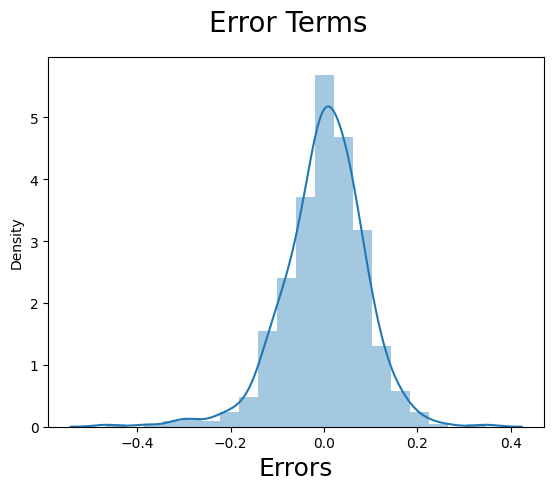

In [63]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

## Durbin Watson test

In [64]:
from statsmodels.stats.stattools import durbin_watson

dw_test = durbin_watson((y_train - y_train_price))
print(f'Durbin-Watson Test: {dw_test}')

Durbin-Watson Test: 2.008166091681963


## Since Value is close to 2 we can conclude that there is no autocorrelation

## Q-Q test

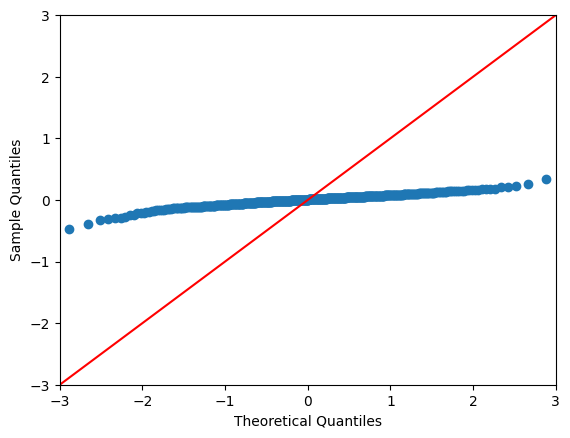

In [65]:
import scipy.stats as stats

# Q-Q plot
sm.qqplot((y_train - y_train_price), line='45')
plt.show()


## Predictions

In [66]:
numerical_variables = ['temp','hum','windspeed','cnt']

df_test[numerical_variables] = scaler.transform(df_test[numerical_variables])

In [67]:
y_test = df_test.pop('cnt')
X_test = df_test

In [68]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[x_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [69]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

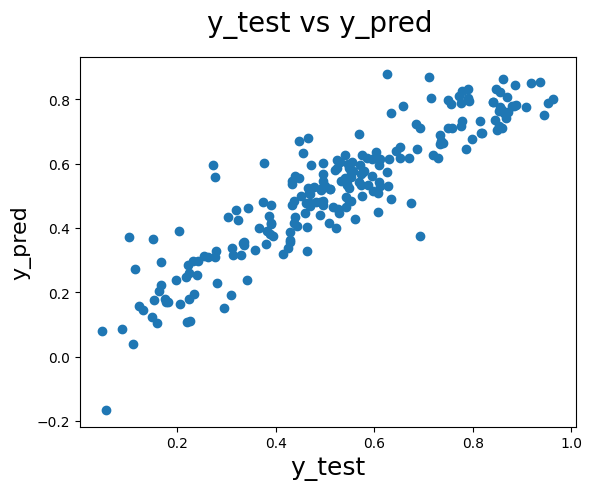

In [70]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [71]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8194868882771147

In [72]:
lm.params

const                                                                                      0.299247
yr                                                                                         0.234968
holiday                                                                                   -0.098856
temp                                                                                       0.398801
windspeed                                                                                 -0.153936
spring                                                                                    -0.103767
winter                                                                                     0.065136
DEC                                                                                       -0.052294
JAN                                                                                       -0.057228
JULY                                                                                      -0.062014
